In [56]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
from tensorflow.keras import Sequential
from tensorflow import keras
import matplotlib.pyplot as plt

In [57]:
data = pd.read_csv('../input/digit-recognizer/train.csv')
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [58]:
data.shape

(42000, 785)

## Split Data

Splitting data into X_train, y_train, X_cv, y_cv

In [59]:
from sklearn.model_selection import train_test_split

features = data.drop(['label'], axis=1).values
labels = data['label'].values

x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.2)

In [60]:
len(x_train), len(y_train)

(33600, 33600)

In [61]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [62]:
x_train = x_train / 255.
x_test = x_test / 255.

In [174]:
model = Sequential([
    Conv2D(64, (3,3), input_shape=(28, 28, 1), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.25),
    Conv2D(32, (3,3), input_shape=(28, 28, 1), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.25),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax'),
])

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss=keras.losses.SparseCategoricalCrossentropy(),
    metrics=[keras.metrics.SparseCategoricalAccuracy()]
)

In [175]:
model.fit(x_train, y_train, epochs=50, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/50
525/525 [==============================] - 2s 4ms/step - loss: 0.5758 - sparse_categorical_accuracy: 0.8121 - val_loss: 0.1191 - val_sparse_categorical_accuracy: 0.9667
Epoch 2/50
525/525 [==============================] - 2s 4ms/step - loss: 0.2147 - sparse_categorical_accuracy: 0.9352 - val_loss: 0.0744 - val_sparse_categorical_accuracy: 0.9782
Epoch 3/50
525/525 [==============================] - 2s 4ms/step - loss: 0.1562 - sparse_categorical_accuracy: 0.9547 - val_loss: 0.0636 - val_sparse_categorical_accuracy: 0.9795
Epoch 4/50
525/525 [==============================] - 2s 4ms/step - loss: 0.1379 - sparse_categorical_accuracy: 0.9598 - val_loss: 0.0497 - val_sparse_categorical_accuracy: 0.9845
Epoch 5/50
525/525 [==============================] - 2s 4ms/step - loss: 0.1189 - sparse_categorical_accuracy: 0.9645 - val_loss: 0.0485 - val_sparse_categorical_accuracy: 0.9844
Epoch 6/50
525/525 [==============================] - 3s 5ms/step - loss: 0.1091 - sparse_categorica

In [165]:
def show_example(index, preds, dsx, dsy):
    current_img = dsx[index][:, :, 0] * 255
    prediction = np.argmax(preds[index])
    if(len(dsy) > 0 or dsy != None) :
        label = dsy[index]
        print("Label:", label)
    print("Prediction:", prediction)
    
    
    plt.imshow(current_img, interpolation='nearest', cmap='gray')
    plt.show()
    
def analysis(preds, limit, dsx, dsy):
    correct = 0
    misclassified = []
    for i in range(limit):
        prediction = np.argmax(preds[i])
        label = dsy[i]
        if(prediction == label):
            correct += 1
        else:
            misclassified.append(i)
    
    print(f"Predictions in a limit of {limit} are {(correct / limit) * 100} correct")
    print(f"Misclassfied {len(misclassified)} examples:")
    for i in misclassified:
        show_example(i, preds, dsx, dsy)

In [150]:
preds = model.predict(x_test)

Label: 6
Prediction: 6


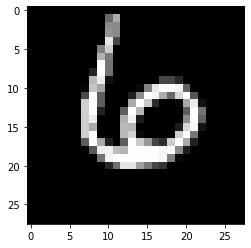

Label: 2
Prediction: 2


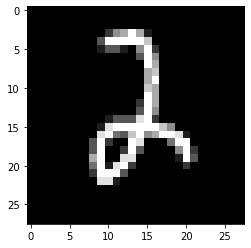

(None, None)

In [154]:
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'
show_example(9, preds, x_test, y_test), show_example(23, preds, x_test, y_test)

Predictions in a limit of 10 are 90.0 correct
Misclassfied 1 examples:
Label: 3
Prediction: 8


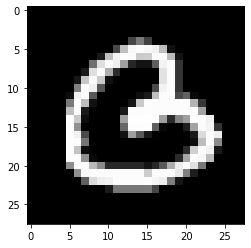

In [155]:
analysis(preds, 10, x_test, y_test)

In [156]:
X_test = pd.read_csv('../input/digit-recognizer/test.csv')
X_test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [157]:
X_test = X_test.to_numpy()

In [158]:
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
X_test = X_test / 255.

In [159]:
preds = model.predict(X_test)

In [160]:
labels = [np.argmax(i) for i in preds]

In [161]:
idxs = [i+1 for i in range(len(labels))]
submit = pd.DataFrame({'ImageId': idxs, 'Label': labels})
submit.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3


In [167]:
show_example(13, preds, x_test, None)

TypeError: object of type 'NoneType' has no len()

In [169]:
submit.to_csv('submission.csv', index=False)